# 📄 1. Úvod

- Projekt analyzuje vývoj cien nehnuteľností na Slovensku podľa krajov.
- Zdroj: Národná banka Slovenska
- Cieľ: Zistiť regionálne rozdiely a trendy v cenách nehnuteľností.

# 📅 2. Načítanie a čistenie dát

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# nacitanie CSV
file_path = "./data-nbs/real-estate-price-by-region.csv"
df = pd.read_csv(
    file_path,
    sep=";",
    encoding="utf-8-sig",  # odstranuje BOM
    skiprows=2,  # preskoci prve 2 riadky
    quotechar='"',  # umozni spracovat hodnoty v uvodzovkach
)
# display(df)

# premenovanie stlpcov
df = df.rename(columns={"Rok, Štvrťrok": "Rok", "SR spolu": "Spolu"})

# odfiltrovanie iba riadkov, kde Rok je typu int (rok, nie štvrťrok ako '4Q 2024')
df = df[df["Rok"].astype(str).str.match(r"^\d{4}$")].copy()

# nastvenie rokov ako index
df = df.set_index("Rok")
# zmena formatu str na int
df.index = df.index.astype(int)
# print(type(df.index[0]))

# uprava  ciselneho formatu
# print(df["BA"].apply(type)) # - vypise cely stlpec
# print(type(df["BA"].iloc[0])) # - vypise 1 bunku v stlpci
cols = df.columns
for col in cols:
    df[col] = (
        df[col].astype(str).str.replace(" ", "").str.replace(",", ".").astype(float)
    )

# display(df)
df.head(5)

,Spolu,BA,TT,NR,TN,ZA,BB,KE,PO
Rok,,,,,,,,,
2024,2500.2402,3189.8626,1842.6759,1388.7540,1581.0672,1871.5093,1538.2085,2101.9162,1859.8821
2023,2480.2110,3130.5896,1832.1117,1400.1744,1582.4151,1933.6217,1658.7553,2102.0006,1870.8310
2022,2638.9266,3356.6988,1842.0271,1401.3927,1628.5515,2021.2716,1757.3663,2335.3842,2062.3416
2021,2175.8300,2825.6871,1459.6515,1172.1177,1297.1406,1657.3770,1379.3437,1798.2391,1574.1419
2020,1761.7530,2333.4363,1195.5591,950.9804,1054.1616,1312.4622,989.1686,1325.1475,1147.9209


# 📊 3. Analýzy

## ✅ 3.1. Najdrahší kraj za posledné obdobie

- Úloha: Ktorý región má v poslednom období najvyššie ceny a ako sa vyvíjali za posledných 5 rokov?

- Cieľ: Identifikovať región s najvyššou priemernou cenou nehnuteľností zobraziť vývoj cien v jednotlivých regiónoch. 

Najvyššia cena v roku 2024 bola v kraji: BA (3189.86 €/m²)


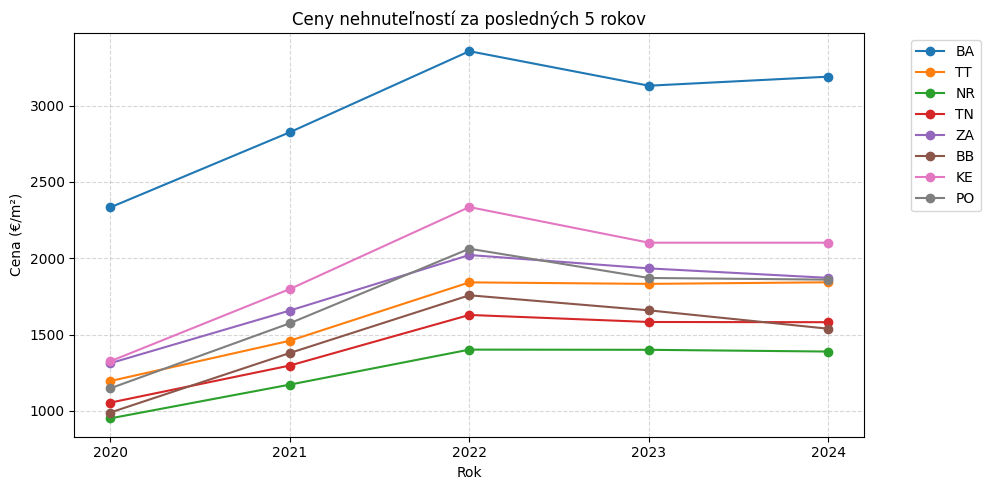

In [5]:
# selekcia regionov
region_cols = df.columns.drop(["Spolu"])

# obdobie
years = 5

# vytvorenie df pre sledovane obdobie
# vyberie všetky riadky, kde index (rok) je vacsí alebo rovny poslednemu indexu v sledovanom obdobi (ak 5 rocne obdobie, tak posledny sledovany rok od roku 2024(vratane) je 2020)
df_recent_years = df[df.index >= df.index.max() - (years - 1)]
# display(df_recent_years)

# ktory kraj ma najvyssiu cenu v najnovsom roku
# najnovsi rok
latest_year = df.index.max()
# data pre najnovsi rok
latest_data = df_recent_years.loc[latest_year]
# vyberiem kraje
region_values = latest_data[region_cols]
# zistim region s najvyssou cenou
top_region = region_values.idxmax()
top_price = region_values.max()

print(
    f"Najvyššia cena v roku {latest_year} bola v kraji: {top_region} ({top_price:.2f} €/m²)"
)

# vizualizacia
# vytvorenie noveho grafu, figsize - urcuje rozmer grafu
plt.figure(figsize=(10, 5))
# vytvorenie ciaroveho grafu pre kazdy kraj
for region in region_cols:
    # marker='o' - ozn. bodu kruzkom, label - nazov pre graf v legende
    plt.plot(df_recent_years.index, df_recent_years[region], marker="o", label=region)
# nadpis grafu
plt.title(f"Ceny nehnuteľností za posledných {years} rokov")
# nazov osi x,y
plt.xlabel("Rok")
plt.ylabel("Cena (€/m²)")
# explicitne nastavenie hodnot osi x
plt.xticks(df_recent_years.index)
# zobrazenie legendy
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# zobrazenie mriezky
plt.grid(True, linestyle="--", alpha=0.5)
# auto uprava rozlozenia grafu
plt.tight_layout()
plt.show()

## ✅ 3.2. Najväčšia zmena cien

- Úloha: Ktorý kraj mal najvyšší nárast cien medzi 2022 a 2024?

- Cieľ: Porovnať hodnoty v stĺpcoch jednotlivých krajov medzi rokmi 2022 a 2024 a zistiť, kde bol najväčší rozdiel.

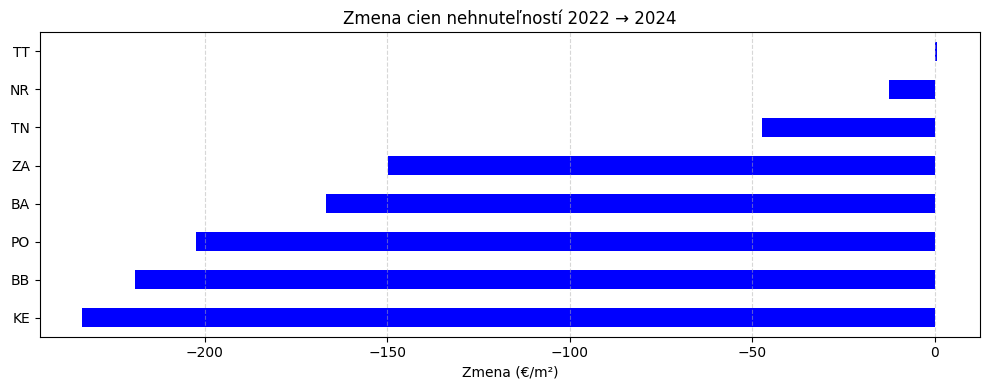

In [6]:
# vypocitam rozdiel medzi cenami pre uvazovane roky pre kazdy kraj
price_change = df.loc[2024, region_cols] - df.loc[2022, region_cols]
# print(price_change)

# vytvorim dataframe z vypocitanych hodnot a usporiadam ich
df_change = price_change.sort_values()

# vizualizacia
plt.figure(figsize=(10, 4))
# pouzitie pandas vstavany 'df_xyz'.plot()
# funguje priamo na 'series' alebo 'dataframe' - vie auto pouzit indexy, hodnoty osi, popisky
# je to vyhodnejsie v pripade stlpcovych grafov, ako klasicky matplotlib plt.plot()
# takze priamo zavolam .plot() na dataframe
df_change.plot(kind="barh", color="blue")
plt.title("Zmena cien nehnuteľností 2022 → 2024")
plt.xlabel("Zmena (€/m²)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## ✅ 3.3. Priemerné ceny SR a kraje

- Úloha: Zobraziť priemerné ceny v jednotlivých krajoch a porovnať ich so Slovenským priemerom.

- Cieľ: Zobraziť na grafe priemerné ceny v jednotlivých krajoch za všetky dostupné roky v kontexte so Slovenským priemerom.

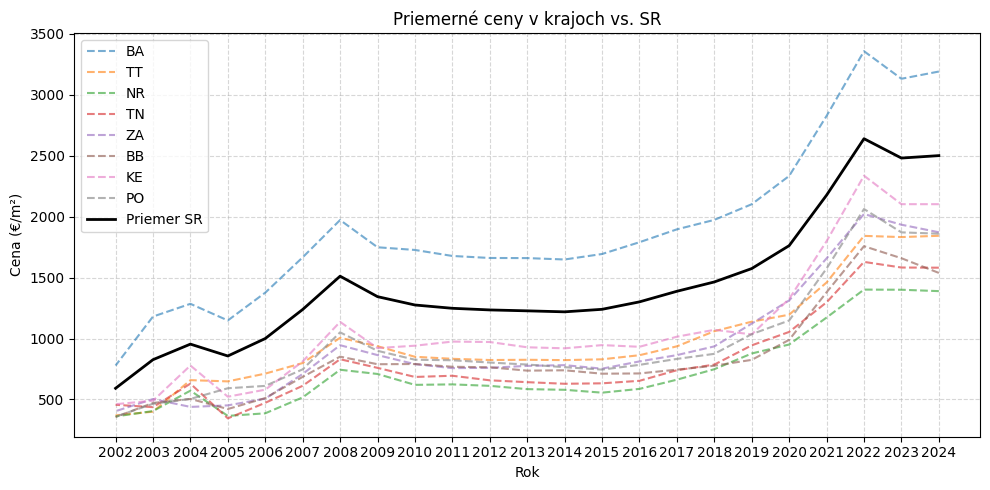

In [7]:
plt.figure(figsize=(10, 5))
for col in region_cols:
    plt.plot(df.index, df[col], linestyle="--", alpha=0.6, label=col)
plt.plot(df.index, df["Spolu"], color="black", linewidth=2, label="Priemer SR")
plt.title("Priemerné ceny v krajoch vs. SR")
plt.xlabel("Rok")
plt.ylabel("Cena (€/m²)")
plt.xticks(df.index)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## ✅ 3.4. Rozdiely od priemeru SR

- Úloha: Priemerné ceny v jednotlivých rokoch pre celú SR a porovnanie medzi krajmi

- Cieľ: Vykresliť celkový priemer za kraj v jednotlivých rokoch. Kraj nad/pod priemerom.

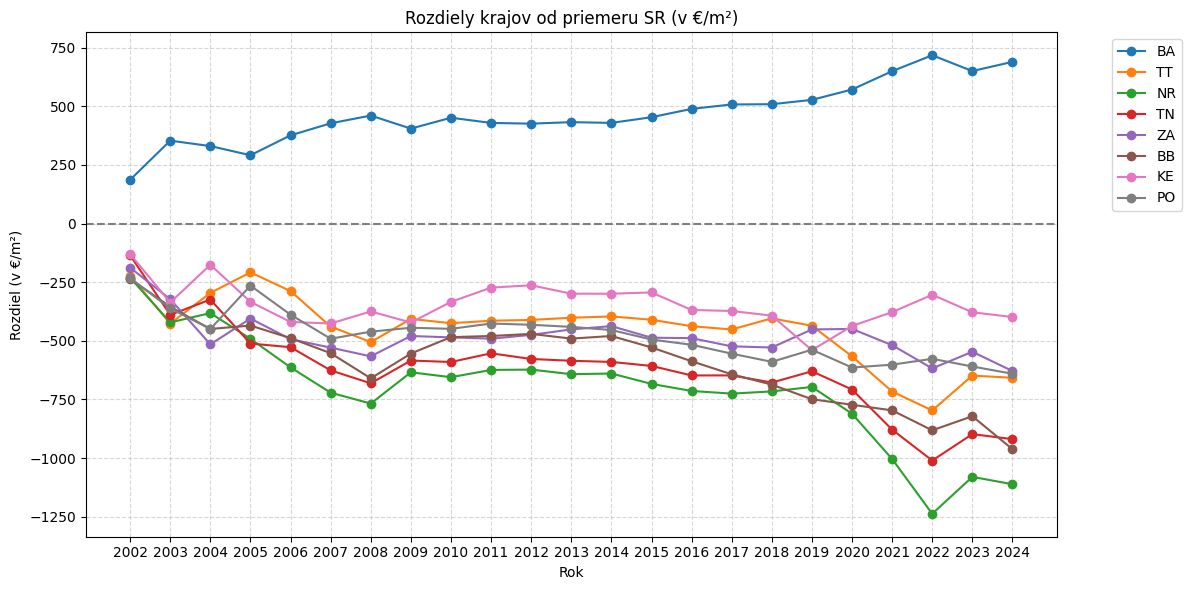

In [8]:
# rozdiel medzi a krajmi aceloslovenským priemerom za každý rok (stĺpec 'Spolu')
# axis=0 - odcitanie po riadkoch v dataframe
df_diff = df[region_cols].subtract(df["Spolu"], axis=0)
# pridam stlpec 'Rok'
df_diff["Rok"] = df.index

plt.figure(figsize=(12, 6))
for col in region_cols:
    plt.plot(df_diff["Rok"], df_diff[col], marker="o", label=col)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Rozdiely krajov od priemeru SR (v €/m²)")
plt.xlabel("Rok")
plt.ylabel("Rozdiel (v €/m²)")
plt.xticks(df_diff["Rok"].unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()